In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio import SeqIO
import numpy as np
import pandas as pd
import os
import glob

In [2]:
%cd ~/storage/metagenome/bact_4x/new_con/diamond/
!ls

/mnt/storage/metagenome/bact_4x/new_con/diamond
14.0.faa	26.0.faa_dbcan	29.1.faa	46.1.faa_dbcan	left
14.0.faa_dbcan	26.1.faa	29.1.faa_dbcan	46.faa.flat	right
14.1.faa	26.1.faa_dbcan	29.faa.flat	46.faa.gdx	temp.57557
14.1.faa_dbcan	26.faa.flat	29.faa.gdx	46_nice.tsv	tmp1
14.faa.flat	26.faa.gdx	29_nice.tsv	46_prokka	tmp2
14.faa.gdx	26_nice.tsv	29_prokka	Hotpep
14_nice.tsv	26_prokka	46.0.faa	con
14_prokka	29.0.faa	46.0.faa_dbcan	db
26.0.faa	29.0.faa_dbcan	46.1.faa	fake_otu


### Prokka import

Import common info about contig and gene id 

#### NOT RUN

gbk SeqIO based parser \
This parser didnt work correctly. Too low number of seqs. 

In [3]:
# for f in glob.glob('./*faa_dbcan/overview.txt'):
#     df = pd.read_csv(f'{f}', sep='\t')
#     files_l.append(df)
files_in_dir=['./14_prokka/PROKKA_06282021.gbk', './26_prokka/PROKKA_06282021.gbk', './29_prokka/PROKKA_06282021.gbk', './46_prokka/PROKKA_06282021.gbk']
files_l = []
for f in files_in_dir:
    prokka_read_id = []
    prokka_gene_annotation = []
    prokka_gene_id = []
    for record in SeqIO.parse(f'{f}', "genbank"):
        for f in record.features:
            if f.type == "CDS" and "gene" in f.qualifiers:
                gene = f.qualifiers["gene"][0]
                prokka_read_id.append(record.id)
                prokka_gene_annotation.append(f.qualifiers["gene"][0])
                prokka_gene_id.append(f.qualifiers["locus_tag"][0])
    df = pd.DataFrame(list(zip(prokka_read_id, prokka_gene_id, prokka_gene_annotation)),
                columns=['contig', 'Gene_ID', 'Annotation'])
    files_l.append(df)
df = pd.concat(files_l, keys=['14', '26', '29', '46'])
df.reset_index(inplace=True)
community = df['level_0'].str.split('.',expand=True)[0]
df.insert(0, 'community', community)
df_prokka = df.drop(columns=['level_0', 'level_1'])
df_prokka

KeyboardInterrupt: 

gff grep based parser

In [11]:
files_in_dir=['./14_prokka/PROKKA_06282021.gff', './26_prokka/PROKKA_06282021.gff', './29_prokka/PROKKA_06282021.gff', './46_prokka/PROKKA_06282021.gff']
files_l = []
for f in files_in_dir:   
    !grep -oP "(s|c)[0-9]+\s.*ID=[A-Z]+_[0-9]+" $f | sed 's/[\t].*[\t]ID=/\t/g' > contig_ids_temp.tsv
    df = pd.read_csv('contig_ids_temp.tsv', sep='\t',  names=['contig', 'Gene_ID'])
    community = f'{f}'.split("/")[1][:2]
    df.insert(0, 'community', community)
    files_l.append(df)
    !rm contig_ids_temp.tsv
df_ids = pd.concat(files_l)
df_ids["contig"] = df_ids["contig"].str[1:]
df_ids

,community,contig,Gene_ID
0,14,427,MEBDDFFA_00001
1,14,427,MEBDDFFA_00002
2,14,427,MEBDDFFA_00003
3,14,427,MEBDDFFA_00004
4,14,427,MEBDDFFA_00005
...,...,...,...
121953,46,68,AAKEFBLG_121954
121954,46,68,AAKEFBLG_121955
121955,46,68,AAKEFBLG_121956
121956,46,1467,AAKEFBLG_121957


#### OPTIONAL

In work


In [ ]:
files_in_dir=['./14_prokka/PROKKA_06282021.gff', './26_prokka/PROKKA_06282021.gff', './29_prokka/PROKKA_06282021.gff', './46_prokka/PROKKA_06282021.gff']
files_l = []
for f in files_in_dir:   
    !grep -oP "(s|c)[0-9]+\s.*ID=[A-Z]+_[0-9]+" $f | sed 's/[\t].*[\t]ID=/\t/g' > contig_ids_temp.tsv
    !f = grep -oP "product=.+\n" 
    !sed -i "s/$/\t$f/"  contig_ids_temp
    df = pd.read_csv('contig_ids_temp.tsv', sep='\t',  names=['contig', 'Gene_ID'])
    community = f'{f}'.split("/")[1][:2]
    df.insert(0, 'community', community)
    files_l.append(df)
    
    pd.read_csv
    !rm contig_ids_temp.tsv
df_ids = pd.concat(files_l)
df_ids["contig"] = df_ids["contig"].str[1:]
df_ids

In [39]:
f = './14_prokka/PROKKA_06282021.gff'
# !grep -oP "(s|c)[0-9]+\s.*ID=[A-Z]+_[0-9]+" $f | sed 's/[\t].*[\t]ID=/\t/g' > contig_ids_temp.tsv
!grep -oP "(product=.*\n" $f | head
# !paste contig_ids_temp.tsv right > contig_ids_temp.tsv
# !head contig_ids_temp

In [ ]:
!head -n 50000 ./14_prokka/PROKKA_06282021.gff | tail -n 30

In [735]:
df_prokka_wc.loc[df_prokka_wc['Gene_ID'] == 'AAKEFBLG_00264']

,community,contig,Gene_ID


In [54]:
df_prokka_wc['community'].value_counts()

NameError: name 'df_prokka_wc' is not defined

In [12]:
d = {"14.0":"14.0.faa",
     "14.1":"14.1.faa",
     "26.0":"26.0.faa",
     "26.1":"26.1.faa",
     "29.0":"29.0.faa",
     "29.1":"29.1.faa",
     "46.0":"46.0.faa",
     "46.1":"46.1.faa"}

In [13]:
%%bash

for file in con/kraken2_res/*tsv; do
    comm=$(basename $file | cut -c1-2)
    cat $file | cut -f2,6 > con/kraken2_res/$comm\_nice.tsv
#     sed -i 'g/\;[a-zA-Z\s]+group\;//i' con/kraken2_res/$comm\_nice.tsv
done;
# grep "Pseudomonas oleovorans" con/kraken2_res/*_res_kraken.tsv
# grep "Pseudomonas oleovorans" con/kraken2_res/*_nice.tsv

In [14]:
for f in glob.glob('con/kraken2_res/*_nice.tsv'):
    l_1 = []
    counter = 0
    counter2 = 0
    with open(f, 'r') as file:      
        for l in file:

            if counter > 0:
                l_1[-1] = l_1[-1] + '\n'
            counter = 0
            for i in l.split(";"):
                if (not i.endswith("group")) and (counter < 8):              
                    l_1.append(i.rstrip())
                    if counter2 == 0:
                        l_1[0] = '\t' + l_1[0]
                    counter += 1
                    counter2 += 1
    with open(f, 'w') as file:
        file.write('\t'.join(l_1) + '\n')

!head con/kraken2_res/14_nice.tsv
%rm con/kraken2_res/_n_nice.tsv

	427	cellular organisms	Bacteria	Bacteroidetes	Cytophagia	Cytophagales	Cytophagaceae	Sporocytophaga	Sporocytophaga myxococcoides
	1457	cellular organisms	Bacteria	Bacteroidetes	Cytophagia	Cytophagales	Cytophagaceae	Sporocytophaga	Sporocytophaga myxococcoides
	1813	cellular organisms	Bacteria	Verrucomicrobia	Opitutae	Opitutales	Opitutaceae	Opitutus	Opitutus terrae
	768	cellular organisms	Bacteria	Proteobacteria	Alphaproteobacteria	Hyphomicrobiales	Phyllobacteriaceae	Mesorhizobium
	1440	cellular organisms	Bacteria	Proteobacteria	Alphaproteobacteria	Hyphomicrobiales	Bradyrhizobiaceae	Bradyrhizobium
	897	cellular organisms	Bacteria	Verrucomicrobia	Opitutae	Opitutales	Opitutaceae	Opitutus	Opitutus terrae
	1041	cellular organisms	Bacteria
	1454	cellular organisms	Bacteria	Verrucomicrobia	Opitutae	Opitutales	Opitutaceae	unclassified Opitutaceae	Opitutaceae bacterium EW11
	608	cellular organisms	Bacteria	Actinobacteria	Actinomycetia	Micrococcales	Beutenbergiaceae	Miniimonas	unclassified Miniim

In [15]:
files_l = []
names = []
for f in glob.glob('./*faa_dbcan/overview.txt'):
    df = pd.read_csv(f'{f}', sep='\t')
    filename = f'{f}'.split("/")[1][:4]
    df.insert(0, 'filename', filename)
    files_l.append(df)
df = pd.concat(files_l)
df.reset_index(inplace=True)
community = df['filename'].str.split('.',expand=True)[0]
df.insert(0, 'community', community)
df_cazy = df.drop(columns=['filename', 'index'])
df_cazy.columns = ['community', 'Gene_ID', 'HMMER', 'Hotpep', 'DIAMOND', 'NumberofTools']
df_cazy


# files_l = []
# for f in glob.glob('./con/kraken2_res/*nice.tsv'):
#     df = pd.read_csv(f'{f}', sep='\t',  names=['zero', 'contig', "d" ,"Kingdom", "Phylum",  "Class" ,  "Order",  "Family",  "Genus",   "Species"])
#     community = f'{f}'.split("/")[-1][:2]
#     df.insert(0, 'community', community)
#     files_l.append(df)
# df = pd.concat(files_l)
# df = df.drop(['zero', 'd'], axis=1)
# df

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools
0,46,AAKEFBLG_00098,GT1(11-421),-,-,1
1,46,AAKEFBLG_00146,GH2(21-413),-,GH2,2
2,46,AAKEFBLG_00264,GH154(15-332),GH154(12),GH154,3
3,46,AAKEFBLG_00268,GH42(14-380),GH42(3),GH42,3
4,46,AAKEFBLG_00282,CBM67(117-293)+GH78(320-842),GH78(1)+CBM67(23),GH78,3
...,...,...,...,...,...,...
13356,46,AAKEFBLG_117026,-,-,PL8,1
13357,46,AAKEFBLG_35246,-,-,GH2,1
13358,46,AAKEFBLG_78144,-,-,GH36,1
13359,46,AAKEFBLG_106008,-,-,CBM48+GH13_10,1


In [16]:
df_cazy

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools
0,46,AAKEFBLG_00098,GT1(11-421),-,-,1
1,46,AAKEFBLG_00146,GH2(21-413),-,GH2,2
2,46,AAKEFBLG_00264,GH154(15-332),GH154(12),GH154,3
3,46,AAKEFBLG_00268,GH42(14-380),GH42(3),GH42,3
4,46,AAKEFBLG_00282,CBM67(117-293)+GH78(320-842),GH78(1)+CBM67(23),GH78,3
...,...,...,...,...,...,...
13356,46,AAKEFBLG_117026,-,-,PL8,1
13357,46,AAKEFBLG_35246,-,-,GH2,1
13358,46,AAKEFBLG_78144,-,-,GH36,1
13359,46,AAKEFBLG_106008,-,-,CBM48+GH13_10,1


In [17]:
df_cazy_f = df_cazy[df_cazy['NumberofTools'] > 1]
df_cazy_f = df_cazy_f.replace('-', value=np.nan)
# df.replace(regex={r'^ba.$': 'new'})
df_cazy_f = df_cazy_f.replace('\(.*\)', '', regex=True)
df_cazy_f

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3
5,46,AAKEFBLG_00283,GH2,GH2,GH2,3
...,...,...,...,...,...,...
12995,46,AAKEFBLG_60620,NaN,CBM50,CBM50,2
12998,46,AAKEFBLG_102001,NaN,CBM50,CBM50,2
12999,46,AAKEFBLG_67159,NaN,CBM50,CBM50,2
13003,46,AAKEFBLG_113036,NaN,CBM6,GH2,2


In [14]:
# df_cazy_f['is_equal'] = (df_cazy_f['HMMER'] == df_cazy_f['Hotpep'])
df_cazy_f.HMMER.mode()

0    GT2_Glycos_transf_2
dtype: object

In [61]:
df_cazy_f['HMMER'].value_counts()[:10].index.tolist()

['GT2_Glycos_transf_2',
 'GT4',
 'GH3',
 'GT51',
 'GH23',
 'GH2',
 'GH103',
 'GH51',
 'GH1',
 'GH10']

#### mode

In [18]:
df_cazy_f["mode"] = df_cazy_f[['HMMER', 'Hotpep', 'DIAMOND']].T.mode().values.tolist()[0]
df_cazy_f

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78
5,46,AAKEFBLG_00283,GH2,GH2,GH2,3,GH2
...,...,...,...,...,...,...,...
12995,46,AAKEFBLG_60620,NaN,CBM50,CBM50,2,CBM50
12998,46,AAKEFBLG_102001,NaN,CBM50,CBM50,2,CBM50
12999,46,AAKEFBLG_67159,NaN,CBM50,CBM50,2,CBM50
13003,46,AAKEFBLG_113036,NaN,CBM6,GH2,2,CBM6


In [ ]:
df_cazy_simple = df_cazy_f[]

In [25]:
df_max = df_cazy_f[['community','mode']].groupby(['mode']).count().sort_values('community', ascending=False)
pd.set_option('display.max_rows', None)
df_max

AttributeError: 'community' is not a valid function for 'Series' object

In [ ]:
pd.reset_option('all')

In [737]:
# df_cazy_f[['community','mode']].agg("mode").count()
fake_otu = df_cazy_f.groupby(['community','mode']).size().reset_index(name='counts')
fake_otu = fake_otu.pivot(index='mode', columns='community', values='counts').fillna('0')
fake_otu.to_csv('fake_otu',index=True, sep = '\t')
# fake_otu
# !pwd


NameError: name 'sns' is not defined

In [813]:
td = pd.read_csv("fake_otu", sep='\t')
td = td.drop_duplicates()
td

,mode,14,26,29,46
0,AA1,13.0,19.0,11.0,18.0
1,AA10,4.0,3.0,3.0,1.0
2,AA12,6.0,5.0,4.0,2.0
3,AA1_3,0.0,0.0,0.0,1.0
4,AA2,2.0,0.0,0.0,1.0
...,...,...,...,...,...
480,PL9,2.0,2.0,4.0,5.0
481,PL9_1,0.0,0.0,0.0,3.0
482,PL9_2,0.0,0.0,0.0,1.0
483,PL9_4,1.0,1.0,1.0,1.0


In [845]:
sortedl = l[['count','mode']].groupby("mode").count().sort_values('count', ascending=False)
sortedl.index.tolist()

['CBM50',
 'CE10',
 'GH23',
 'GH3',
 'GT2',
 'GT4',
 'GT51',
 'GH2',
 'GT2_Glycos_transf_2',
 'CE1',
 'CE4',
 'GH0',
 'GT0']

In [861]:
liss = sortedl.index.tolist()
liss

['CBM50',
 'CE10',
 'GH23',
 'GH3',
 'GT2',
 'GT4',
 'GT51',
 'GH2',
 'GT2_Glycos_transf_2',
 'CE1',
 'CE4',
 'GH0',
 'GT0']

In [862]:
l = pd.melt(td, id_vars='mode', value_vars=['14', '26', '29', '46'], var_name='community', value_name='count')
# l = l.sort_values(by=['count'], ascending=False)[0:40]
todraw = l[l['mode'].isin(liss)]
todraw

,mode,community,count
115,CBM50,14,81.0
159,CE1,14,55.0
161,CE10,14,75.0
171,CE4,14,52.0
179,GH0,14,41.0
260,GH2,14,60.0
263,GH23,14,73.0
271,GH3,14,62.0
379,GT0,14,37.0
396,GT2,14,203.0


In [851]:
l

,mode,community,count
0,AA1,14,13.0
1,AA10,14,4.0
2,AA12,14,6.0
3,AA1_3,14,0.0
4,AA2,14,2.0
...,...,...,...
1935,PL9,46,5.0
1936,PL9_1,46,3.0
1937,PL9_2,46,1.0
1938,PL9_4,46,1.0


In [2]:
d = sns.catplot(data=todraw, hue="community",
                y = "mode", x='count', kind="bar", aspect=2,
                height=10,legend= False, orient="h")

plt.plot([1,2,3], label = 'Community')
plt.ylabel('glycosylases', fontsize = 16)
plt.xlabel('count', fontsize = 20)
plt.legend(fontsize = 18)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 17)

NameError: name 'sns' is not defined

In [736]:
fake_otu

community,14,26,29,46
mode,,,,
AA1,13,19,11,18
AA10,4,3,3,1
AA12,6,5,4,2
AA1_3,0,0,0,1
AA2,2,0,0,1
...,...,...,...,...
PL9,2,2,4,5
PL9_1,0,0,0,3
PL9_2,0,0,0,1


In [871]:
df_taxa = df.drop(['community', 'contig'], axis=1)
taxa_duplicates_dropped = df_taxa.drop_duplicates()
taxa_duplicates_dropped

,zero,d,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,NaN,cellular organisms,Bacteria,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,NaN
1,NaN,cellular organisms,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,unclassified Bosea
2,NaN,cellular organisms,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Weeksellaceae,Kaistella,Kaistella jeonii
3,NaN,cellular organisms,Bacteria,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae,Mycobacterium,Mycobacterium shimoidei
4,NaN,cellular organisms,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,unclassified Mesorhizobium
...,...,...,...,...,...,...,...,...,...
1534,NaN,cellular organisms,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,Mesorhizobium plurifarium
1535,NaN,cellular organisms,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Xanthobacteraceae,Xanthobacter,unclassified Xanthobacter
1547,NaN,cellular organisms,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Erythrobacteraceae,Croceicoccus,Croceicoccus bisphenolivorans
1557,NaN,cellular organisms,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Luteimonas,Luteimonas mephitis


In [872]:
files_l = []
for f in glob.glob('./con/kraken2_res/*nice.tsv'):
    df = pd.read_csv(f'{f}', sep='\t',  names=['zero', 'contig', "d" ,"Kingdom", "Phylum",  "Class" ,  "Order",  "Family",  "Genus",   "Species"])
    community = f'{f}'.split("/")[-1][:2]
    df.insert(0, 'community', community)
    files_l.append(df)
df = pd.concat(files_l)
df_taxa = df.drop(['zero', 'd'], axis=1)
df_taxa
# taxa = df['taxa'].str.split(';',expand=True).loc[:, 1:7]
# taxa.columns = ["Kingdom", "Phylum",  "Class" ,  "Order",  "Family",  "Genus",   "Species"]
# taxa.query("Kingdom != 'Bacteria'")
# df.query("Kingdom != 'Bacteria'")


,community,contig,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,29,540,Bacteria,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,NaN
1,29,471,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,unclassified Bosea
2,29,109,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Weeksellaceae,Kaistella,Kaistella jeonii
3,29,954,Bacteria,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae,Mycobacterium,Mycobacterium shimoidei
4,29,297,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,unclassified Mesorhizobium
...,...,...,...,...,...,...,...,...,...
1584,26,1387,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Luteimonas,unclassified Luteimonas
1585,26,964,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Devosiaceae,Devosia,unclassified Devosia
1586,26,1016,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,Mesorhizobium ephedrae
1587,26,35,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,NaN,NaN,NaN


In [919]:
df_cazy_f.duplicated(subset=['Gene_ID']).sum()


0

In [920]:
df_taxa["ID"] = df_taxa["community"].astype(str) + "_" + df_taxa["contig"].astype(str)
df_ids["ID"] = df_ids["community"].astype(str) + "_" + df_ids["contig"].astype(str)


In [697]:
df_cazy_f df_prokka_wc df_taxa

,community,level_0,level_1,contig,Gene_ID,Annotation
0,14,14,0,c427,MEBDDFFA_00005,amaA_1
1,14,14,1,c427,MEBDDFFA_00007,hipO_1
2,14,14,2,c427,MEBDDFFA_00009,secA_1
3,14,14,3,c427,MEBDDFFA_00010,secA_2
4,14,14,4,c427,MEBDDFFA_00011,secA_3
...,...,...,...,...,...,...
165413,46,46,49190,c68,AAKEFBLG_121937,arnT_10
165414,46,46,49191,c68,AAKEFBLG_121939,rgtE_11
165415,46,46,49192,c68,AAKEFBLG_121943,chaB_2
165416,46,46,49193,c68,AAKEFBLG_121951,bphC_5


In [703]:
df_cazy_f

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode
0,46,AAKEFBLG_00098,GT1,NaN,NaN,1,GT1
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78
...,...,...,...,...,...,...,...
13356,46,AAKEFBLG_117026,NaN,NaN,PL8,1,PL8
13357,46,AAKEFBLG_35246,NaN,NaN,GH2,1,GH2
13358,46,AAKEFBLG_78144,NaN,NaN,GH36,1,GH36
13359,46,AAKEFBLG_106008,NaN,NaN,CBM48+GH13_10,1,CBM48+GH13_10


In [922]:
merge3.isna().sum()

community_x         0
Gene_ID             0
HMMER            4283
Hotpep           5863
DIAMOND          4769
NumberofTools       0
mode                0
community_y         0
contig_x            0
ID                  0
community           0
contig_y            0
Kingdom             9
Phylum             52
Class              91
Order             117
Family            132
Genus             181
Species           509
dtype: int64

In [921]:
merge1 = df_cazy_f.merge(df_ids, on='Gene_ID', how='left')
merge3 = merge1.merge(df_taxa, on='ID', how='left')
merge3

,community_x,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode,community_y,contig_x,ID,community,contig_y,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,46,AAKEFBLG_00098,GT1,NaN,NaN,1,GT1,46,435,46_435,46,435,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2,46,435,46_435,46,435,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154,46,186,46_186,46,186,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42,46,186,46_186,46,186,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78,46,186,46_186,46,186,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13356,46,AAKEFBLG_117026,NaN,NaN,PL8,1,PL8,46,1142,46_1142,46,1142,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,Paenibacillus paeoniae
13357,46,AAKEFBLG_35246,NaN,NaN,GH2,1,GH2,46,118,46_118,46,118,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Azospirillaceae,Azospirillum,unclassified Azospirillum
13358,46,AAKEFBLG_78144,NaN,NaN,GH36,1,GH36,46,1301,46_1301,46,1301,Bacteria,Firmicutes,Clostridia,Eubacteriales,Oscillospiraceae,Ruminiclostridium,Ruminiclostridium cellobioparum
13359,46,AAKEFBLG_106008,NaN,NaN,CBM48+GH13_10,1,CBM48+GH13_10,46,140,46_140,46,140,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Azospirillaceae,Azospirillum,unclassified Azospirillum


In [979]:
merge3

,community_x,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode,community_y,contig_x,ID,community,contig_y,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,46,AAKEFBLG_00098,GT1,NaN,NaN,1,GT1,46,435,46_435,46,435,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2,46,435,46_435,46,435,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154,46,186,46_186,46,186,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42,46,186,46_186,46,186,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78,46,186,46_186,46,186,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13356,46,AAKEFBLG_117026,NaN,NaN,PL8,1,PL8,46,1142,46_1142,46,1142,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,Paenibacillus paeoniae
13357,46,AAKEFBLG_35246,NaN,NaN,GH2,1,GH2,46,118,46_118,46,118,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Azospirillaceae,Azospirillum,unclassified Azospirillum
13358,46,AAKEFBLG_78144,NaN,NaN,GH36,1,GH36,46,1301,46_1301,46,1301,Bacteria,Firmicutes,Clostridia,Eubacteriales,Oscillospiraceae,Ruminiclostridium,Ruminiclostridium cellobioparum
13359,46,AAKEFBLG_106008,NaN,NaN,CBM48+GH13_10,1,CBM48+GH13_10,46,140,46_140,46,140,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Azospirillaceae,Azospirillum,unclassified Azospirillum


In [933]:
taxa = merge3.iloc[: , [6, 9, 10, 12, 13, 14, 15, 16, 17 ,18]]
merge3.iloc[: , [6, 9, 10, 12, 13, 14, 15, 16, 17 ,18]].groupby("community").count()

,mode,ID,Kingdom,Phylum,Class,Order,Family,Genus,Species
community,,,,,,,,,
14,2873,2873,2867,2852,2840,2831,2825,2816,2704
26,3316,3316,3316,3316,3316,3314,3314,3293,3213
29,2879,2879,2879,2854,2841,2826,2821,2814,2746
46,4293,4293,4290,4287,4273,4273,4269,4257,4189


In [911]:
merge1['community_y'].value_counts()
merge1.isna().sum()

community_x         0
Gene_ID             0
HMMER            4283
Hotpep           5863
DIAMOND          4769
NumberofTools       0
mode                0
community_y         0
contig              0
dtype: int64

In [1013]:
# fake_otu = df_cazy_f.groupby(['community','mode']).size().reset_index(name='counts')
# fake_otu = fake_otu.pivot(index='mode', columns='community', values='counts').fillna('0')
# fake_otu.to_csv('fake_otu',index=True, sep = '\t')

fake_taxa = taxa.groupby(['community','mode', 'Phylum']).size().reset_index(name='counts')
fake_taxa

,community,mode,Phylum,counts
0,14,AA1,Actinobacteria,1
1,14,AA1,Bacteroidetes,1
2,14,AA1,Proteobacteria,9
3,14,AA1,Verrucomicrobia,2
4,14,AA10,Actinobacteria,2
...,...,...,...,...
2420,46,PL9_1,Firmicutes,3
2421,46,PL9_2,Firmicutes,1
2422,46,PL9_4,Proteobacteria,1
2423,46,SLH,Firmicutes,14


In [996]:
draws3.groupby(['Phylum']).count().sort_values('community', ascending=False)

,community,mode,counts,Abditibacteriota,Actinobacteria,Armatimonadetes,Bacteroidetes,Chlamydiae,Cyanobacteria,Firmicutes,Planctomycetes,Proteobacteria,Verrucomicrobia
Phylum,,,,,,,,,,,,,
Proteobacteria,52,52,52,52,52,52,52,52,52,52,52,52,52
Actinobacteria,51,51,51,51,51,51,51,51,51,51,51,51,51
Bacteroidetes,47,47,47,47,47,47,47,47,47,47,47,47,47
Verrucomicrobia,38,38,38,38,38,38,38,38,38,38,38,38,38
Firmicutes,24,24,24,24,24,24,24,24,24,24,24,24,24
Planctomycetes,8,8,8,8,8,8,8,8,8,8,8,8,8
Cyanobacteria,2,2,2,2,2,2,2,2,2,2,2,2,2
Abditibacteriota,1,1,1,1,1,1,1,1,1,1,1,1,1
Armatimonadetes,1,1,1,1,1,1,1,1,1,1,1,1,1


In [959]:
todraw2 = fake_taxa[fake_taxa['mode'].isin(liss)]
todraw2

,community,mode,Phylum,counts
90,14,CBM50,Actinobacteria,3
91,14,CBM50,Bacteroidetes,2
92,14,CBM50,Proteobacteria,74
93,14,CBM50,Verrucomicrobia,2
129,14,CE1,Actinobacteria,5
...,...,...,...,...
2344,46,GT4,Proteobacteria,208
2345,46,GT4,Verrucomicrobia,15
2354,46,GT51,Actinobacteria,5
2355,46,GT51,Firmicutes,12


In [1014]:
# fake_taxa["community"] = fake_taxa.to_numeric(fake_taxa["community"])
# fake_taxa.groupby(['Phylum']).count().sort_values('community', ascending=False)
fake_taxa

,community,mode,Phylum,counts
0,14,AA1,Actinobacteria,1
1,14,AA1,Bacteroidetes,1
2,14,AA1,Proteobacteria,9
3,14,AA1,Verrucomicrobia,2
4,14,AA10,Actinobacteria,2
...,...,...,...,...
2420,46,PL9_1,Firmicutes,3
2421,46,PL9_2,Firmicutes,1
2422,46,PL9_4,Proteobacteria,1
2423,46,SLH,Firmicutes,14


In [997]:
taxa

,mode,ID,community,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,GT1,46_435,46,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
1,GH2,46_435,46,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
2,GH154,46_186,46,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
3,GH42,46_186,46,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
4,GH78,46_186,46,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
...,...,...,...,...,...,...,...,...,...,...
13356,PL8,46_1142,46,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,Paenibacillus paeoniae
13357,GH2,46_118,46,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Azospirillaceae,Azospirillum,unclassified Azospirillum
13358,GH36,46_1301,46,Bacteria,Firmicutes,Clostridia,Eubacteriales,Oscillospiraceae,Ruminiclostridium,Ruminiclostridium cellobioparum
13359,CBM48+GH13_10,46_140,46,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Azospirillaceae,Azospirillum,unclassified Azospirillum


In [946]:
sns.catplot(data=todraw2, hue="community", x = "mode", y='counts', kind="bar", aspect=1.5, height=10)

SyntaxError: keyword argument repeated (<ipython-input-946-484dc70924b3>, line 1)

In [999]:
phylums = fake_taxa.pivot(columns='Phylum', values='counts').fillna("0").apply(pd.to_numeric)
draws3 = pd.concat([fake_taxa, phylums], axis=1)
draws3

,community,mode,Phylum,counts,Abditibacteriota,Acidobacteria,Actinobacteria,Armatimonadetes,Bacteroidetes,Chlamydiae,Cyanobacteria,Firmicutes,Opisthokonta,Planctomycetes,Proteobacteria,Verrucomicrobia
0,14,AA1,Actinobacteria,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14,AA1,Bacteroidetes,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,AA1,Proteobacteria,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
3,14,AA1,Verrucomicrobia,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,14,AA10,Actinobacteria,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,46,PL9_1,Firmicutes,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
2421,46,PL9_2,Firmicutes,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2422,46,PL9_4,Proteobacteria,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2423,46,SLH,Firmicutes,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0


In [1018]:
# import matplotlib.patches as mpatches

# plt.figure(figsize=(8, 13))
# # sns.barplot(data=todraw2, x="mode", y = "counts", hue="community")


# s1 = sns.barplot(x = 'community', y = 'Proteobacteria', data = draws3, color = 'violet')
# s2 = sns.barplot(x = 'community', y = 'Actinobacteria', data = draws3, color = 'cyan')
# s3 = sns.barplot(x = 'community', y = 'Bacteroidetes', data = draws3, color = 'yellow')
# s4 = sns.barplot(x = 'community', y = 'Verrucomicrobia', data = draws3, color = 'lightpink')
# s5 = sns.barplot(x = 'community', y = 'Firmicutes', data = draws3, color = 'darkgreen')

# bar_1 = mpatches.Patch(color='violet', label='Proteobacteria')
# bar_2 = mpatches.Patch(color='cyan', label='Actinobacteria')
# bar_3 = mpatches.Patch(color='yellow', label='Bacteroidetes')
# bar_4 = mpatches.Patch(color='lightpink', label='Verrucomicrobia')
# bar_5 = mpatches.Patch(color='darkgreen', label='Firmicutes')

# plt.legend(handles=[bar_1, bar_2,bar_3,bar_4,bar_5])

draw_max = fake_taxa[fake_taxa['Phylum'].isin(['Proteobacteria',
                                                       'Actinobacteria', 
                                                       'Bacteroidetes',
                                                       'Verrucomicrobia',
                                                       'Firmicutes'
                                                      ])]

In [1034]:
draw_amazind

mode  counts
Phylum          community              
Proteobacteria  26          254     254
Firmicutes      46          246     246
Proteobacteria  46          236     236
                14          236     236
                29          203     203
Verrucomicrobia 14          155     155
Actinobacteria  46          133     133
Bacteroidetes   29          133     133
Actinobacteria  29          125     125
                14          113     113
Bacteroidetes   26          106     106
Actinobacteria  26           99      99
Verrucomicrobia 29           96      96
Bacteroidetes   14           79      79
Firmicutes      29           57      57
Verrucomicrobia 26           43      43
                46           43      43
Bacteroidetes   46           25      25
Firmicutes      14            4       4

In [1038]:
draw_amazind = draw_max.groupby(['Phylum','community']).count().sort_values('counts', ascending=False)
draw_amazind.reset_index(inplace=True)
draw_amazind

,Phylum,community,mode,counts
0,Proteobacteria,26,254,254
1,Firmicutes,46,246,246
2,Proteobacteria,46,236,236
3,Proteobacteria,14,236,236
4,Proteobacteria,29,203,203
5,Verrucomicrobia,14,155,155
6,Actinobacteria,46,133,133
7,Bacteroidetes,29,133,133
8,Actinobacteria,29,125,125
9,Actinobacteria,14,113,113


<AxesSubplot:xlabel='community', ylabel='counts'>

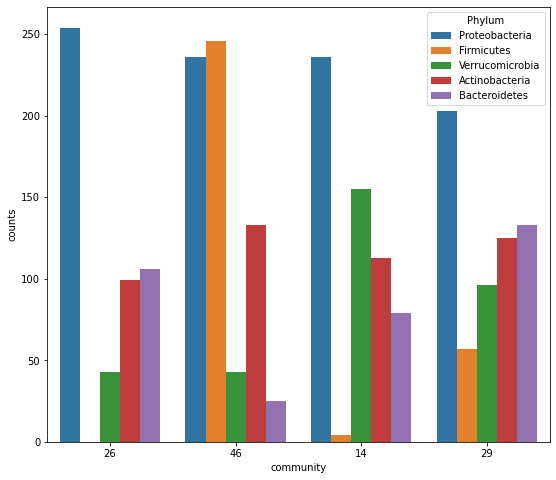

In [1044]:
plt.figure(figsize=(9, 8))
sns.barplot(data=draw_amazind, x="community", y = "counts", hue="Phylum")

In [17]:
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 13))
# sns.barplot(data=todraw2, x="mode", y = "counts", hue="community")


sns.barplot(x = 'community', y = 'Proteobacteria', data = draws3, color = 'violet')


NameError: name 'draws3' is not defined

<Figure size 576x936 with 0 Axes>

In [ ]:
sns.catplot(data=todraw2, hue="Phylum", x = "mode")